In [ ]:
pip install requests_html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=0ae6bfbe7e69b331acb35919921b123137dde3c19725483719d36f0cfdbf3e0c
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
from requests_html import HTMLSession
import json, csv

session = HTMLSession()
url = "https://www.airlinequality.com/airline-reviews/british-airways/page/300"
resp = session.get(url)

#What do I want to extract: title, overallrating, origin, date, review, type of traveler, seat type, route,
#date flown, seat comfort, cabin staff service, food & beverages, inflight entertainment, ground service#wifi ad connectivity
# value for money, recommended.

master= {}
reviewElements = resp.html.xpath("//div[@class = 'col-content']/article/article")

for review in reviewElements:
  reviews ={}
  #Get overall rating
  try:
    reviewRating = review.xpath("//div[@class ='rating-10']/span[1]")
    rating = reviewRating[0].text
  except:
    rating = ''
  reviews['Overall Rating'] = rating
  #Get header
  reviewHeader = review.xpath("//div[@class = 'body']/h2")
  header = reviewHeader[0].text
  reviews['Header'] = header
  #Get Country
  countryT=review.xpath("//div[@class = 'body']/h3")
  country = countryT[0].text
  #will print in fomat name (country) date published, so we can find the country by choosing only words in bracket

  #Get time published
  datePublished=review.xpath("//div[@class = 'body']/h3/time[@itemprop = 'datePublished']")
  date = datePublished[0].text
  reviews['Date Published'] = date
  #Get text review
  textReview = review.xpath("//div[@class='body']/div[@class = 'tc_mobile']/div[@class='text_content']")
  text = textReview[0].text #need to text to see if it is actually 1 indexed
  reviews['Text Review'] = text
  #Get other stats
  statsItem = review.xpath("//tr")
  stats = {}
  for item in statsItem:

    if item.xpath('.//td[2]/span[@class="star fill"]'):
      itemHeader = item.xpath('.//td[1]')[0].text
      itemContent = item.xpath('.//td[2]/span[@class="star fill"]')[-1].text

    else:
      itemHeader = item.xpath('.//td[1]')[0].text
      itemContent = item.xpath('.//td[2]')[0].text
    stats[itemHeader] = itemContent

    reviews['Review Rating'] = stats
  master[country] = reviews


In [ ]:
import csv

with open('bareview.csv', 'w', newline='') as csvfile:
    fieldnames = ['Country', 'Overall Rating', 'Header', 'Date Published', 'Text Review', 'Review Rating']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()  # Write the header row

    for country, review in master.items():
        review['Country'] = country  # Add the country field to the review dictionary
        writer.writerow(review)
for review in reviewElements:

  #Get other stats
  statsItem = review.xpath("//div[@class='body']/div[@class = 'tc_mobile']/div[@class='review_stats']/table/tbody/tr")
  stats = {}

  # Get other stats
  #statsItem = review.xpath("//td[2]")

  for item in statsItem:
          if item.xpath('.//td[2]/span[@class="star fill"]'):
              itemHeader = item.xpath('.//td[1]')[0].text
              itemContent = item.xpath('.//td[2]/span[@class="star fill"]')[-1].text
              print(itemContent)
          else:
              itemHeader = item.xpath('.//td[1]')[0].text
              itemContent = item.xpath('.//td[2]')[0].text
          #stats[itemHeader] = itemContent
  #print(stats)
#         i
#
#        stats[itemHeader] = itemContent
#  print(stats)


In [ ]:
from requests_html import HTMLSession

session = HTMLSession()
url = "https://www.airlinequality.com/airline-reviews/british-airways"
resp = session.get(url)
master = {}
reviewpages = resp.html.xpath("//div[@class='col-content']/div/article/ul")[0].text
total_pages = int(reviewpages[-7:-3])

for i in range(1, total_pages+1):
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}"
    resp = session.get(url)
    reviewElements = resp.html.xpath("//div[@class='col-content']/article/article")

    for review in reviewElements:
      reviews ={}
      #Get overall rating
      try:
        reviewRating = review.xpath("//div[@class ='rating-10']/span[1]")
        rating = reviewRating[0].text
      except:
        rating = ''
      reviews['Overall Rating'] = rating
      #Get header
      reviewHeader = review.xpath("//div[@class = 'body']/h2")
      header = reviewHeader[0].text
      reviews['Title'] = header
      #Get Country
      countryT=review.xpath("//div[@class = 'body']/h3")
      country = countryT[0].text
      #will print in fomat name (country) date published, so we can find the country by choosing only words in bracket

      #Get time published
      datePublished=review.xpath("//div[@class = 'body']/h3/time[@itemprop = 'datePublished']")
      date = datePublished[0].text
      reviews['Date Published'] = date
      #Get text review
      textReview = review.xpath("//div[@class='body']/div[@class = 'tc_mobile']/div[@class='text_content']")
      text = textReview[0].text #need to text to see if it is actually 1 indexed
      reviews['Text Review'] = text
      #Get other stats
      statsItem = review.xpath("//tr")
      stats = {}
      for item in statsItem:

        if item.xpath('.//td[2]/span[@class="star fill"]'):
          itemHeader = item.xpath('.//td[1]')[0].text
          itemContent = item.xpath('.//td[2]/span[@class="star fill"]')[-1].text

        else:
          itemHeader = item.xpath('.//td[1]')[0].text
          itemContent = item.xpath('.//td[2]')[0].text
        stats[itemHeader] = itemContent

        reviews['Review Rating'] = stats
      master[country] = reviews
    print(i)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
import json
f1 = open('bareview.txt', 'w+')
json.dump(master, f1, indent = 4)
f1.close()

In [ ]:
import csv

f = open('bareview.csv', 'w', newline = '')
writer = csv.writer(f, delimiter = ',')
header = ['Country', 'Overall Rating', 'Title', 'Date Published', 'Text Review', 'Type of Traveller', 'Seat Type', 'Route', 'Aircraft', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money', 'Recommended']
rating = ['Type of Traveller', 'Seat Type', 'Route', 'Aircraft', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money', 'Recommended']
writer.writerow(header)
for key, elem in master.items():
  row = [key, elem['Overall Rating'], elem['Title'], elem['Date Published'], elem['Text Review']]
  for i in rating:
    if i in elem['Review Rating']:
      row.append(elem['Review Rating'][i])
    else:
      row.append('')
  writer.writerow(row)
f.close()


In [ ]:
import csv

with open('bareview.csv', 'w', newline='') as csvfile:
    fieldnames = ['Country', 'Overall Rating', 'Title', 'Date Published', 'Text Review', 'Type of Traveller', 'Seat Type', 'Route', 'Aircraft', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money', 'Recommended']

    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()  # Write the header row

    for country, review in master.items():
        review['Country'] = country  # Add the country field to the review dictionary
        writer.writerow(review)


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
review = pd.read_csv('bareview.csv')

In [ ]:
review.head()

,Country,Overall Rating,Title,Date Published,Text Review,Type of Traveller,Seat Type,Route,Aircraft,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Paige Boet (United States) 25th June 2023,1.0,The airline lost my luggage,2023-06-25,The airline lost my luggage and was absolutely...,NaN,Economy Class,New Orleans to London,NaN,June 2023,3.0,3.0,3.0,3.0,1.0,1.0,1.0,no
1,S Layne (United States) 25th June 2023,1.0,fully refunded by our travel insurance,2023-06-25,"We booked on the BA website, round trip flight...",NaN,Business Class,London to Amman,NaN,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
2,E Lanewoski (United Kingdom) 25th June 2023,2.0,no boarding drinks provided,2023-06-25,"First time flying with BA business class, neve...",NaN,Business Class,Heathrow to Bodrum,A321 neo,June 2023,1.0,1.0,1.0,NaN,1.0,NaN,1.0,no
3,Joel Burman (United Kingdom) 24th June 2023,4.0,WiFi didn't work,2023-06-24,You can buy sandwiches and crisps but don't ex...,NaN,Economy Class,Amman to London,NaN,June 2023,1.0,3.0,1.0,1.0,2.0,1.0,2.0,no
4,R Vines (United Kingdom) 24th June 2023,7.0,stick with economy,2023-06-24,This is a two-for-one review covering economy ...,NaN,Business Class,London City to Ibiza,Embraer 190,June 2023,3.0,5.0,3.0,NaN,3.0,NaN,3.0,yes


In [ ]:
review['Title'] = review['Title'].apply(lambda x: x.replace('"',''))

In [ ]:
review['Text Review'] = review['Text Review'].apply(lambda x: x.replace('✅ Trip Verified | ',''))

In [ ]:
review['Text Review'] = review['Text Review'].apply(lambda x: x.replace('Not Verified | ',''))

SyntaxError: ignored

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3404 entries, 0 to 3403
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 3404 non-null   object        
 1   Overall Rating          3399 non-null   float64       
 2   Title                   3404 non-null   object        
 3   Date Published          3404 non-null   datetime64[ns]
 4   Text Review             3404 non-null   object        
 5   Type of Traveller       0 non-null      float64       
 6   Seat Type               3402 non-null   object        
 7   Route                   2730 non-null   object        
 8   Aircraft                1792 non-null   object        
 9   Date Flown              2728 non-null   object        
 10  Seat Comfort            3299 non-null   float64       
 11  Cabin Staff Service     3289 non-null   float64       
 12  Food & Beverages        3051 non-null   float64 

(array([782., 400., 383., 235., 216., 169., 287., 332., 289., 306.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

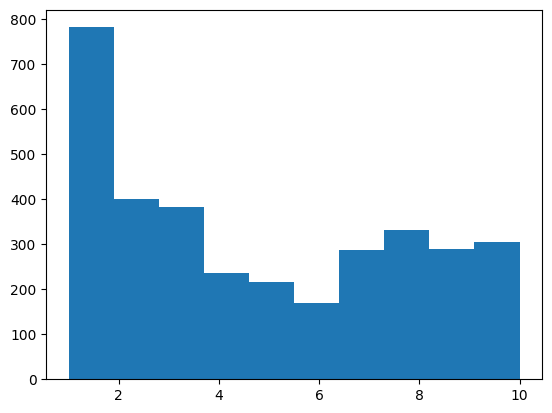

In [ ]:
plt.hist(review['Overall Rating'])

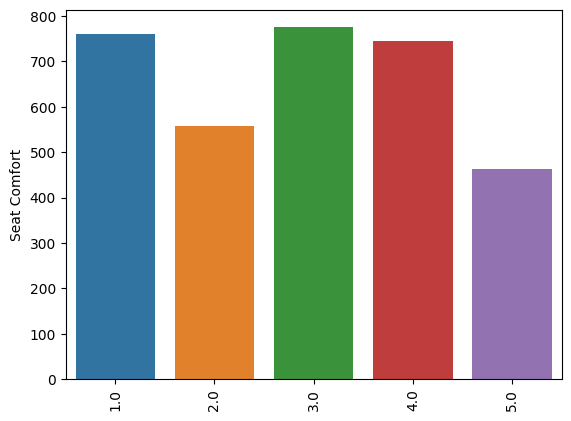

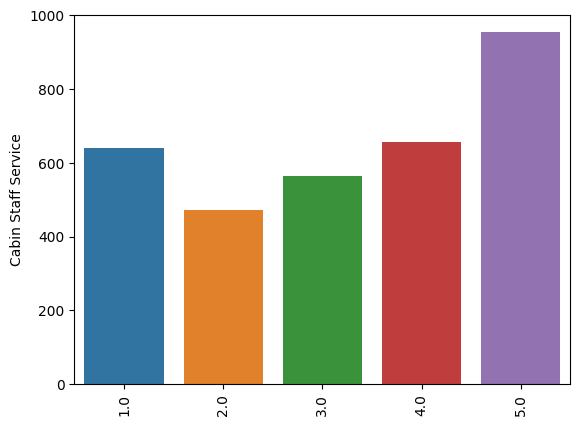

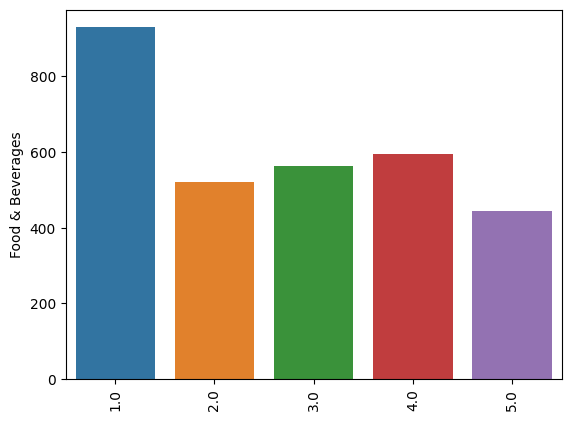

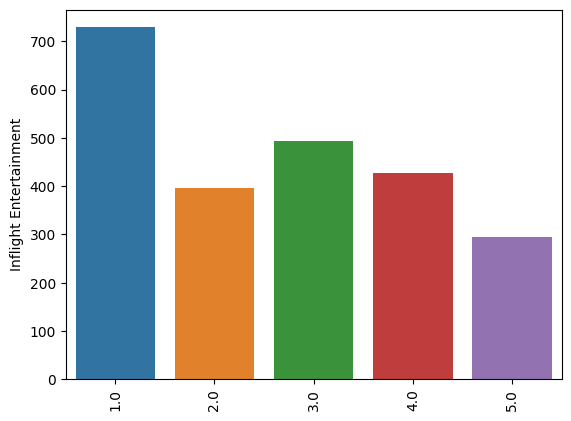

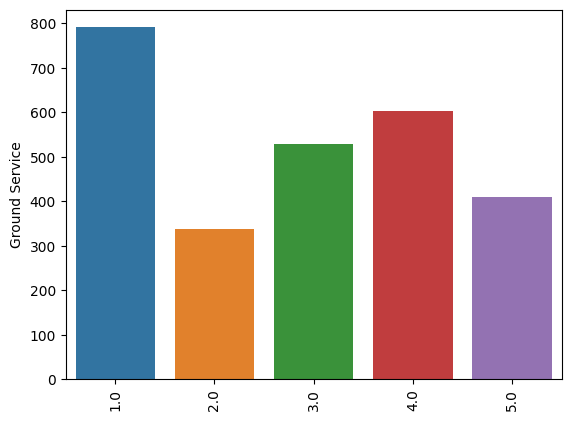

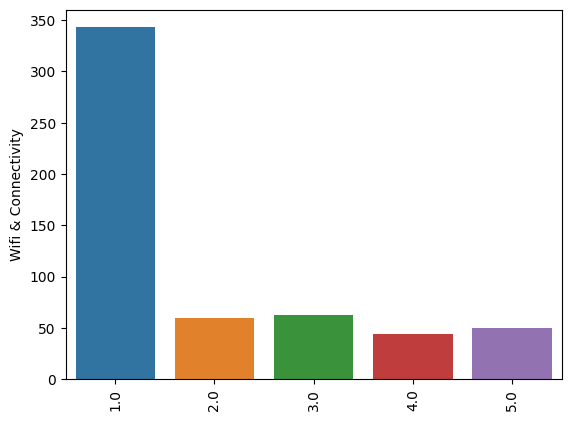

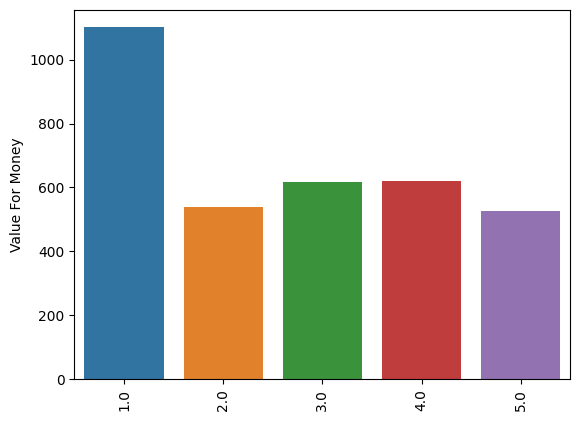

In [ ]:
detailedrating = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']
for i in detailedrating:
  chart = sns.barplot(x = review[i].value_counts().index, y = review[i].value_counts())
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
  plt.show()


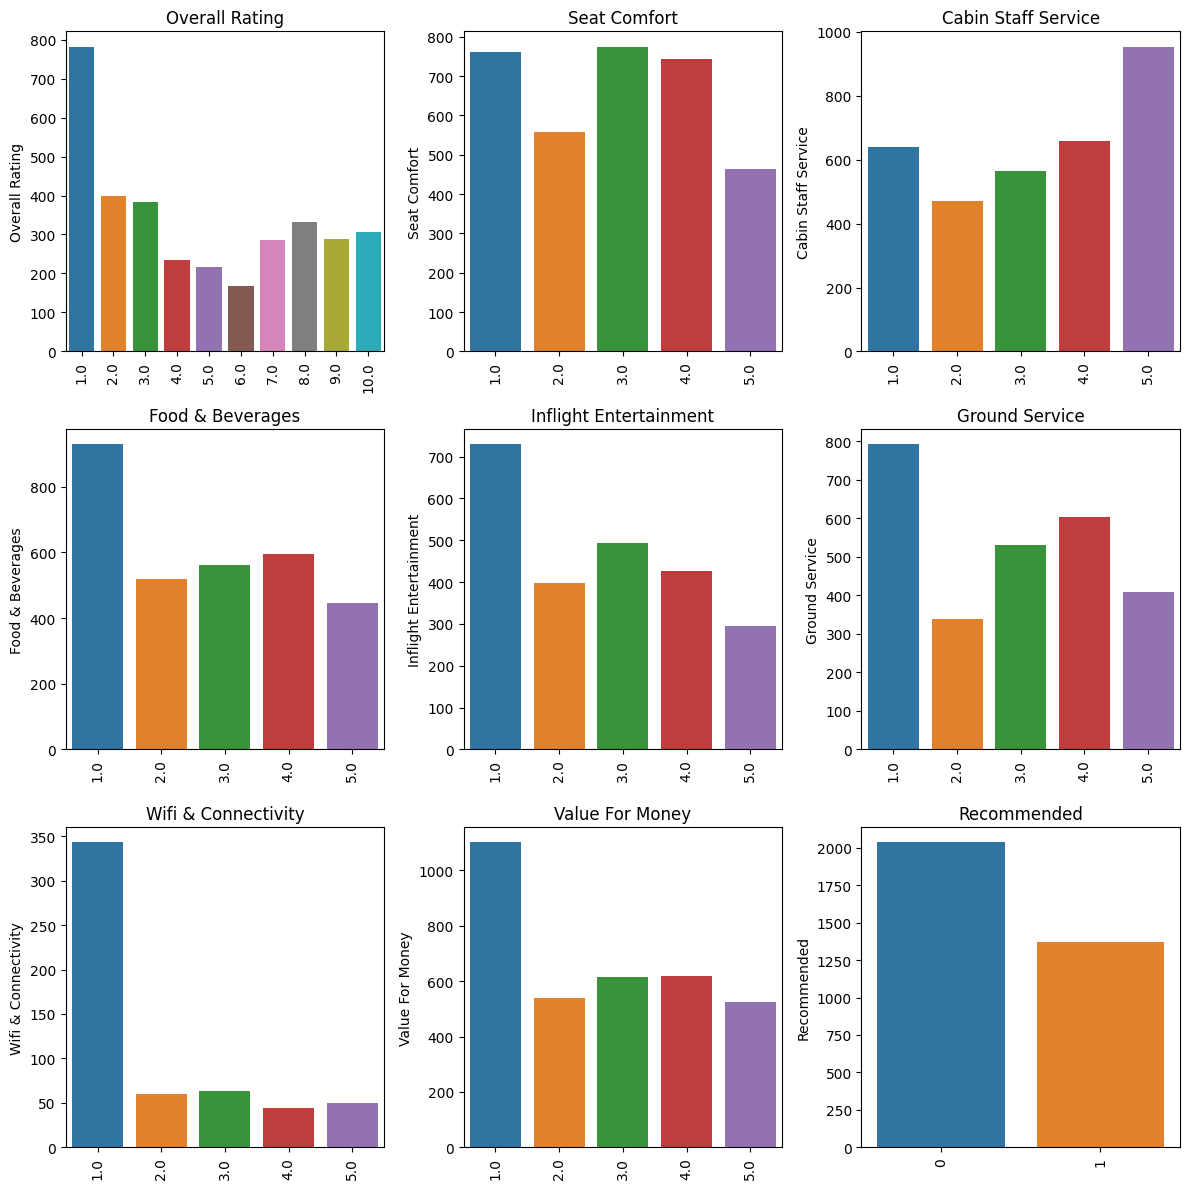

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

detailedrating = ['Overall Rating','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money', 'Recommended']

num_plots = len(detailedrating)
num_cols = 3
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

for i, rating in enumerate(detailedrating):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    chart = sns.barplot(x=review[rating].value_counts().index, y=review[rating].value_counts(), ax=ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    ax.set_title(rating)

plt.tight_layout()
plt.show()


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
#Word Cloud for review
wordcloud_text = ' '.join(review['Text Review'])
wordcloud = WordCloud(width = 800, height = 400). generate(wordcloud_text)

<function matplotlib.pyplot.show(close=None, block=None)>

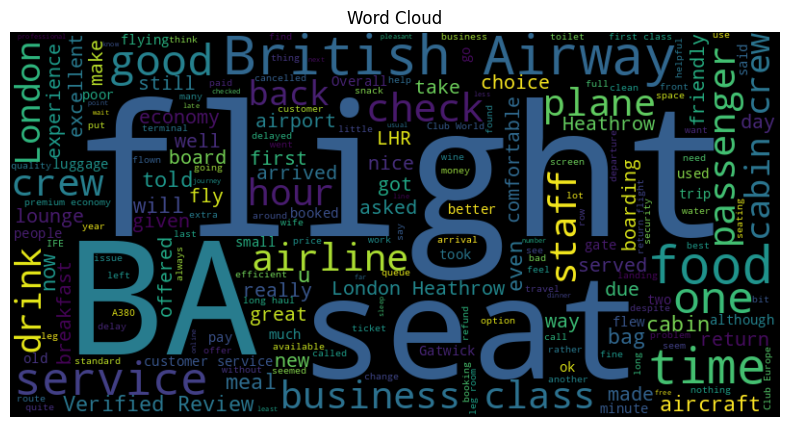

In [ ]:
#Plotting word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

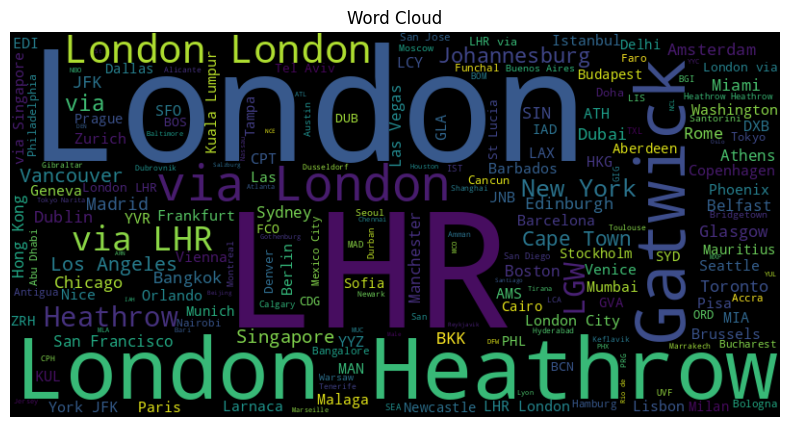

In [ ]:
#Word Cloud for review
non_empty_route = review['Route'].dropna()
wordcloud_text = ' '.join(non_empty_route)
wordcloud = WordCloud(width = 800, height = 400). generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show

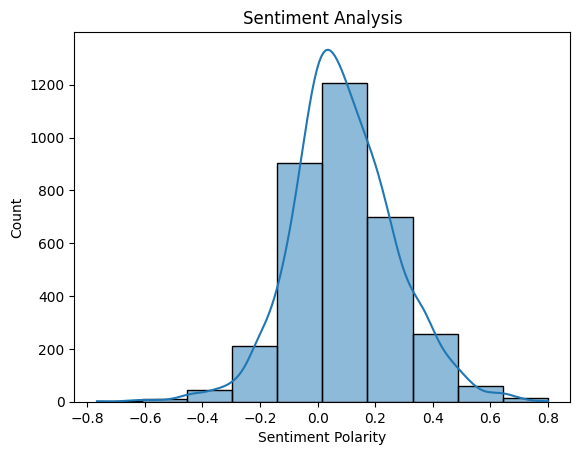

In [ ]:
sentiments = review['Text Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(sentiments, bins=10, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()


In [ ]:
sentiments

0      -0.111979
1       0.095685
2       0.083333
3       0.025000
4       0.284608
          ...   
3399    0.006667
3400    0.173214
3401    0.143148
3402    0.351667
3403   -0.018084
Name: Text Review, Length: 3404, dtype: float64

In [ ]:
review_sentiment = pd.DataFrame({'Text Review': review['Text Review'], 'Sentiment Polarity': sentiments})

In [ ]:
sorted_review = review_sentiment.sort_values('Sentiment Polarity')
top_20_negative_reviews = sorted_review.head(20)['Text Review']
for i in top_20_negative_reviews:
  print(i)

Mykonos to London flight delayed and waiting to depart. They are not on time, be prepared to miss your connections, take off 2 hours late,. The staff is some of the worst I have had on airlines. You may be stuck on the runway and they won’t offer you any water. The worst business class experience I have had.
Stockholm to London. Worst business class flight I have flown. Split seating for myself and my wife because apparently they were overbooked. The meal was inedible for me, and was the worst airline meal I have been served.
San Francisco to London. Terrible service and food. Cramped uncomfortable seats and terrible entertainment, in one of my flights it wasn’t working. The crew couldn’t care less, I will not fly with them again !!!
Miami to London. The breakfast served just before landing was terrible. A terrible croissant with some cream cheese with onions and a breakfast fruit bar. It was wrapped in cellophane. Hardly anyone ate it what a waste.
Terrible. Flight time is well over 2

<function matplotlib.pyplot.show(close=None, block=None)>

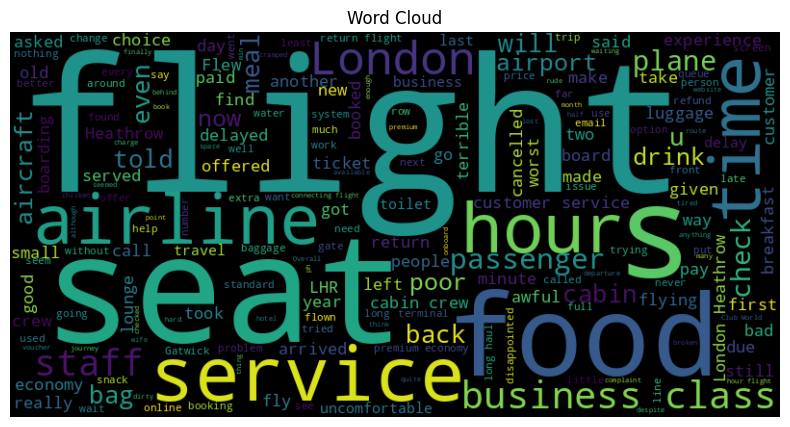

In [ ]:
#Word Cloud for negative_review
negative_review = review_sentiment[review_sentiment['Sentiment Polarity']<0]
wordcloud_text = ' '.join(negative_review['Text Review'])
words_to_remove = ['BA', 'British Airway', 'Verified Review', 'one']
for word in words_to_remove:
  wordcloud_text = wordcloud_text.replace(word,'')
wordcloud = WordCloud(width = 800, height = 400). generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

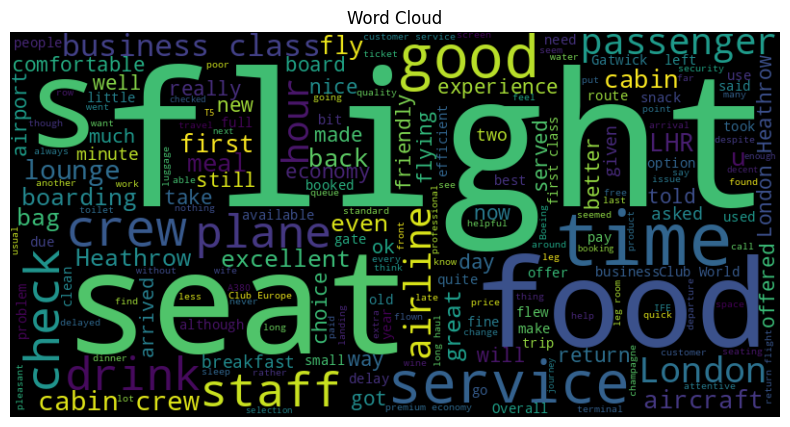

In [ ]:
#Word Cloud for positive_review
positive_review = review_sentiment[review_sentiment['Sentiment Polarity']>0]
wordcloud_text = ' '.join(positive_review['Text Review'])
words_to_remove = ['BA', 'British Airway', 'Verified Review', 'one']
for word in words_to_remove:
  wordcloud_text = wordcloud_text.replace(word,'')
wordcloud = WordCloud(width = 800, height = 400). generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
review['Date Published'] = pd.to_datetime(review['Date Published'])
review['Date Published'].dtype

dtype('<M8[ns]')

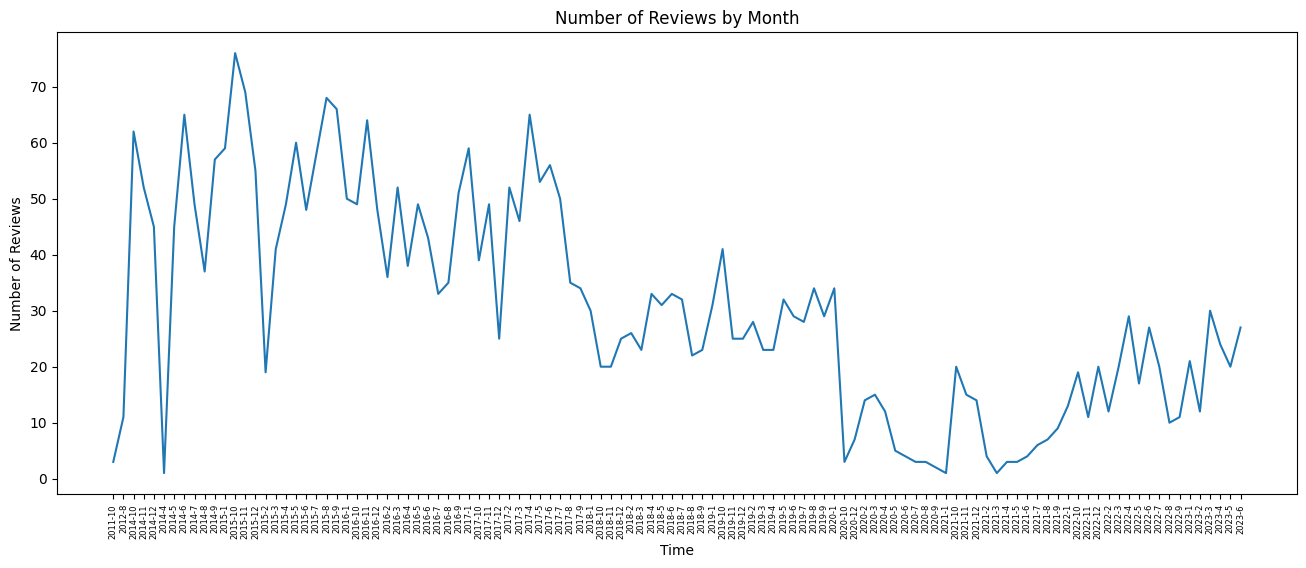

In [ ]:
# Extract month and year from the "Date Published" column
import datetime
import matplotlib.dates as mdates
review['Month'] = review['Date Published'].dt.month
review['Year'] = review['Date Published'].dt.year
review['MonthYear'] = review.apply(lambda row: str(row['Year']) + '-' + str(row['Month']), axis=1)

review_counts = review['MonthYear'].value_counts().sort_index()
# Create the line graph
plt.figure(figsize=(16, 6))
plt.plot(review_counts.index, review_counts.values)

plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Month')
plt.xticks(rotation=90, fontsize =6)
plt.show()

In [ ]:
review_sentiment['MonthYear'] = review['MonthYear']
review_sentiment

,Text Review,Sentiment Polarity,MonthYear
0,The airline lost my luggage and was absolutely...,-0.111979,2023-6
1,"We booked on the BA website, round trip flight...",0.095685,2023-6
2,"First time flying with BA business class, neve...",0.083333,2023-6
3,You can buy sandwiches and crisps but don't ex...,0.025000,2023-6
4,This is a two-for-one review covering economy ...,0.284608,2023-6
...,...,...,...
3399,LHR-JFK-LAX-LHR. Check in was ok apart from be...,0.006667,2012-8
3400,LHR to HAM. Purser addresses all club passenge...,0.173214,2012-8
3401,My son who had worked for British Airways urge...,0.143148,2011-10
3402,London City-New York JFK via Shannon on A318 b...,0.351667,2011-10


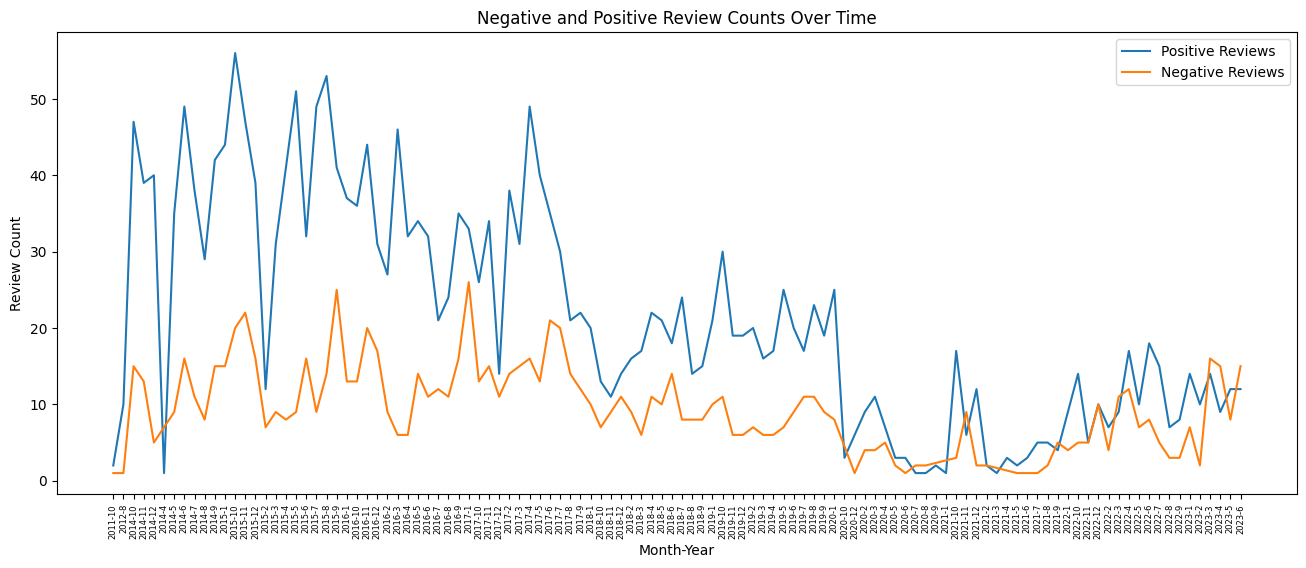

In [ ]:
negative_count_time = review_sentiment[review_sentiment['Sentiment Polarity']<0]
negative_counts = negative_count_time['MonthYear'].value_counts().sort_index()
positive_count_time = review_sentiment[review_sentiment['Sentiment Polarity']>0]
positive_counts = positive_count_time['MonthYear'].value_counts().sort_index()
plt.figure(figsize=(16, 6))
plt.plot(positive_counts.index, positive_counts.values, label='Positive Reviews')
plt.plot(negative_counts.index, negative_counts.values, label='Negative Reviews')


# Customize the plot
plt.xlabel('Month-Year')
plt.ylabel('Review Count')
plt.title('Negative and Positive Review Counts Over Time')
plt.xticks(rotation=90, fontsize =6)
plt.legend()

# Display the plot
plt.show()

In [ ]:
review_sentiment['Overall Rating'] = review['Overall Rating']

In [ ]:
mean_rating = review['Overall Rating'].mean()
print(mean_rating)

4.734039423359811


In [ ]:
review['Sentiment Score'] = review_sentiment['Sentiment Polarity']

In [ ]:
review['Recommended'] = review['Recommended'].replace({'yes':1, 'no':0})

In [ ]:
review['Recommended'].unique()

array([0, 1])

<ipython-input-25-184d33a3208c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= clean_review.corr()


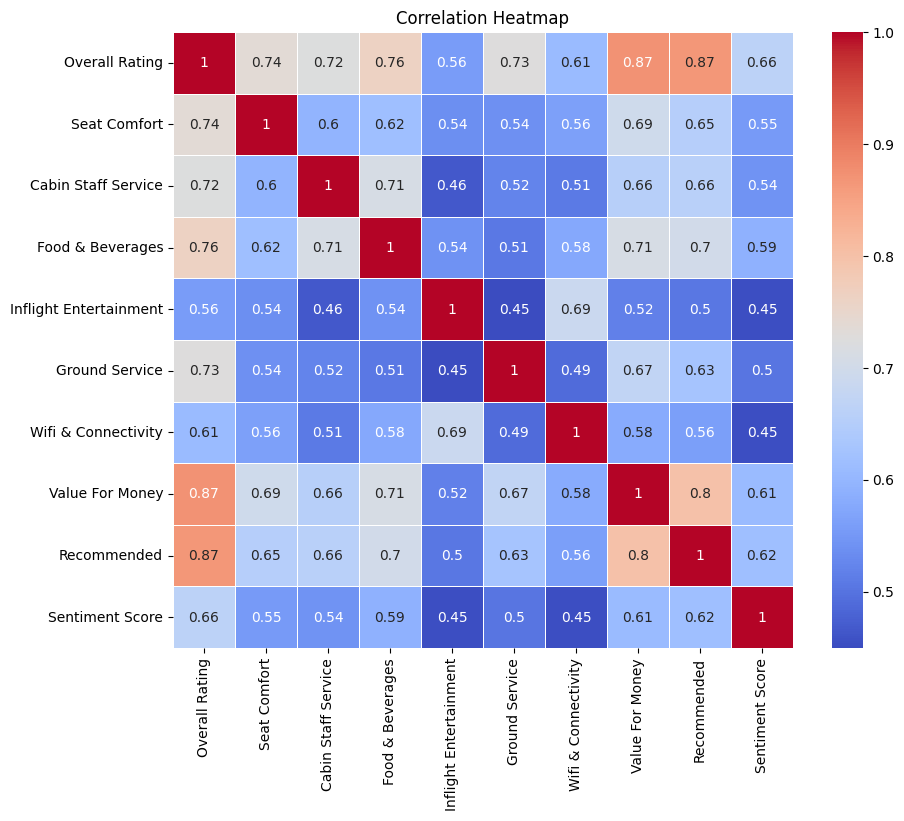

In [ ]:
clean_review = review.drop(['Type of Traveller', 'Month', 'Year'], axis =1)
correlation_matrix= clean_review.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
review['Seat Type'].value_counts()

Economy Class      1798
Business Class     1078
Premium Economy     332
First Class         194
Name: Seat Type, dtype: int64

In [ ]:
review_avg = review.groupby(['Seat Type']).agg(Average_of_Rating = ('Overall Rating', 'mean')).sort_values('Average_of_Rating')
review_avg

,Average_of_Rating
Seat Type,
Economy Class,4.370474
Premium Economy,4.828313
Business Class,5.097493
First Class,5.948187


In [ ]:
review_avg.index

Index(['Economy Class', 'Premium Economy', 'Business Class', 'First Class'], dtype='object', name='Seat Type')

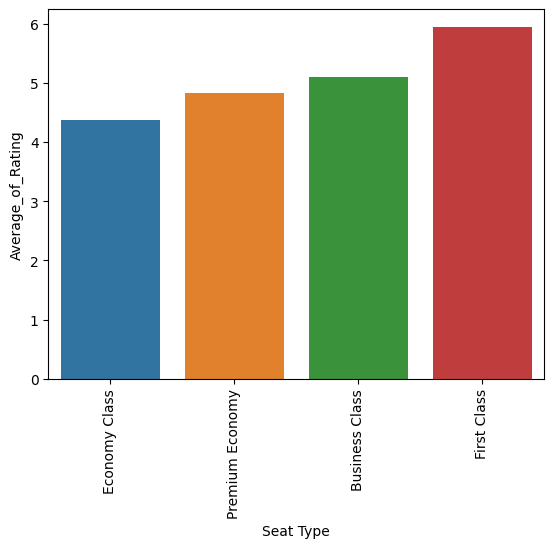

In [ ]:
chart = sns.barplot(x = review_avg.index, y = review_avg['Average_of_Rating'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()